In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://heartdisease4.s3.us-east-2.amazonaws.com/heart.csv"

df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


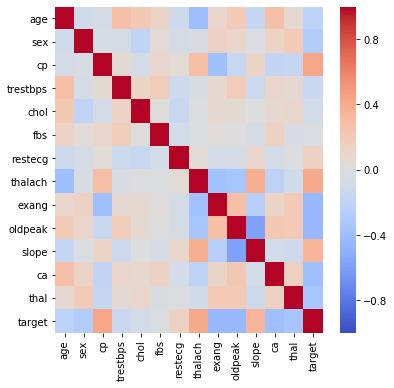

In [3]:
corr = df.corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr,
            vmin=-1,
            cmap='coolwarm');

plt.savefig('../Docs/Heatmap.png')

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop('target', axis=1)
y = df['target']

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


In [5]:
df = df[['thalach',
        'oldpeak',
         'ca',
         'cp',
         'exang',
         'chol',
         'age',
         'trestbps',
         'slope',
         'sex',
         'target'
        ]]

In [6]:
df = pd.get_dummies(df, columns=['ca',
                                     'cp',
                                    'exang',
                                    'sex',
                                    'slope'])

#### Min Max Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib

age_scaler = MinMaxScaler()
age_scaler.fit(df['age'].values.reshape(-1,1))
df['age'] = age_scaler.transform(df['age'].values.reshape(-1,1))
age_scaler_file = '../Machine Learning Program/age_scaler.sav'
joblib.dump(age_scaler, age_scaler_file)

trestbps_scaler = MinMaxScaler()
trestbps_scaler.fit(df['trestbps'].values.reshape(-1,1))
df['trestbps'] = trestbps_scaler.transform(df['trestbps'].values.reshape(-1,1))
trestbps_scaler_file = '../Machine Learning Program/trestbps_scaler.sav'
joblib.dump(trestbps_scaler, trestbps_scaler_file)

chol_scaler = MinMaxScaler()
chol_scaler.fit(df['chol'].values.reshape(-1,1))
df['chol'] = chol_scaler.transform(df['chol'].values.reshape(-1,1))
chol_scaler_file = '../Machine Learning Program/chol_scaler.sav'
joblib.dump(chol_scaler, chol_scaler_file)

oldpeak_scaler = MinMaxScaler()
oldpeak_scaler.fit(df['oldpeak'].values.reshape(-1,1))
df['oldpeak'] = oldpeak_scaler.transform(df['oldpeak'].values.reshape(-1,1))
oldpeak_scaler_file = '../Machine Learning Program/oldpeak_scaler.sav'
joblib.dump(oldpeak_scaler, oldpeak_scaler_file)

thalach_scaler = MinMaxScaler()
thalach_scaler.fit(df['thalach'].values.reshape(-1,1))
df['thalach'] = thalach_scaler.transform(df['thalach'].values.reshape(-1,1))
thalach_scaler_file = '../Machine Learning Program/thalach_scaler.sav'
joblib.dump(thalach_scaler, thalach_scaler_file)

C:\Users\mcand\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['../Machine Learning Program/thalach_scaler.sav']

In [8]:
df.head()

,thalach,oldpeak,chol,age,trestbps,target,ca_0,ca_1,ca_2,ca_3,...,cp_1,cp_2,cp_3,exang_0,exang_1,sex_0,sex_1,slope_0,slope_1,slope_2
0,0.603053,0.370968,0.244292,0.708333,0.481132,1,1,0,0,0,...,0,0,1,1,0,0,1,1,0,0
1,0.885496,0.564516,0.283105,0.166667,0.339623,1,1,0,0,0,...,0,1,0,1,0,0,1,1,0,0
2,0.770992,0.225806,0.178082,0.250000,0.339623,1,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,0.816794,0.129032,0.251142,0.562500,0.245283,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
4,0.702290,0.096774,0.520548,0.583333,0.245283,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1


### Models

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,thalach,oldpeak,chol,age,trestbps,ca_0,ca_1,ca_2,ca_3,ca_4,...,cp_1,cp_2,cp_3,exang_0,exang_1,sex_0,sex_1,slope_0,slope_1,slope_2
287,0.709924,0.000000,0.242009,0.583333,0.566038,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
282,0.480916,0.354839,0.210046,0.625000,0.301887,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
197,0.702290,0.032258,0.292237,0.791667,0.292453,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
158,0.557252,0.064516,0.214612,0.604167,0.292453,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
164,0.778626,0.000000,0.111872,0.187500,0.415094,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
244,0.259542,0.338710,0.132420,0.562500,0.358491,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
84,0.389313,0.096774,0.317352,0.270833,0.075472,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
66,0.549618,0.193548,0.219178,0.458333,0.056604,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
113,0.687023,0.000000,0.194064,0.291667,0.150943,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
167,0.679389,0.580645,0.324201,0.687500,0.433962,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib
train_scores = []
test_scores = []

for k in range(1, 33, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score:0.3f} / {test_score:.3f}')

model = KNeighborsClassifier(n_neighbors = 11)
model.fit(X_train, y_train)
filename = '../Machine Learning Program/KNN_model.sav'
joblib.dump(model, filename)


k: 1, Train/Test Score: 1.000 / 0.803
k: 3, Train/Test Score: 0.868 / 0.803
k: 5, Train/Test Score: 0.833 / 0.855
k: 7, Train/Test Score: 0.833 / 0.842
k: 9, Train/Test Score: 0.846 / 0.868
k: 11, Train/Test Score: 0.846 / 0.882
k: 13, Train/Test Score: 0.850 / 0.882
k: 15, Train/Test Score: 0.859 / 0.868
k: 17, Train/Test Score: 0.850 / 0.868
k: 19, Train/Test Score: 0.850 / 0.868
k: 21, Train/Test Score: 0.855 / 0.868
k: 23, Train/Test Score: 0.850 / 0.855
k: 25, Train/Test Score: 0.855 / 0.855
k: 27, Train/Test Score: 0.850 / 0.882
k: 29, Train/Test Score: 0.855 / 0.855
k: 31, Train/Test Score: 0.850 / 0.882


['../Machine Learning Program/KNN_model.sav']

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

gsc = GridSearchCV(estimator=RandomForestClassifier(),
                  param_grid={
                      'max_depth': range(3,7),
                      'n_estimators': (10, 50, 100, 1000),},
                   cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_

C:\Users\mcand\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [12]:
rfr = RandomForestClassifier(max_depth=best_params['max_depth'],
                            n_estimators=best_params['n_estimators'],
                            random_state=42, verbose=False)

rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.8986784140969163
0.8552631578947368


In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=13, input_dim=21, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])
    return classifier

In [26]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size=32, epochs=1000)

In [36]:
results = classifier.fit(X_train, y_train)

Epoch 1/1000
227/227 [==============================] - 0s 514us/sample - loss: 0.2549 - mean_absolute_error: 0.4823 - acc: 0.5463
Epoch 2/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.2465 - mean_absolute_error: 0.4752 - acc: 0.5463
Epoch 3/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.2389 - mean_absolute_error: 0.4683 - acc: 0.5507
Epoch 4/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.2320 - mean_absolute_error: 0.4615 - acc: 0.5595
Epoch 5/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.2252 - mean_absolute_error: 0.4551 - acc: 0.5859
Epoch 6/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.2193 - mean_absolute_error: 0.4498 - acc: 0.6079
Epoch 7/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.2136 - mean_absolute_error: 0.4444 - acc: 0.6388
Epoch 8/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.2081 - m

227/227 [==============================] - 0s 40us/sample - loss: 0.1086 - mean_absolute_error: 0.2664 - acc: 0.8546
Epoch 64/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.1083 - mean_absolute_error: 0.2650 - acc: 0.8590
Epoch 65/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.1080 - mean_absolute_error: 0.2645 - acc: 0.8502
Epoch 66/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.1071 - mean_absolute_error: 0.2629 - acc: 0.8546
Epoch 67/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.1068 - mean_absolute_error: 0.2614 - acc: 0.8546
Epoch 68/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.1063 - mean_absolute_error: 0.2599 - acc: 0.8546
Epoch 69/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.1057 - mean_absolute_error: 0.2588 - acc: 0.8590
Epoch 70/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.1054 - mean_abs

227/227 [==============================] - 0s 48us/sample - loss: 0.0935 - mean_absolute_error: 0.2198 - acc: 0.8899
Epoch 126/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0932 - mean_absolute_error: 0.2202 - acc: 0.8811
Epoch 127/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0929 - mean_absolute_error: 0.2201 - acc: 0.8811
Epoch 128/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0930 - mean_absolute_error: 0.2199 - acc: 0.8811
Epoch 129/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0927 - mean_absolute_error: 0.2190 - acc: 0.8811
Epoch 130/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0926 - mean_absolute_error: 0.2180 - acc: 0.8855
Epoch 131/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0925 - mean_absolute_error: 0.2175 - acc: 0.8855
Epoch 132/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0922 - m

227/227 [==============================] - 0s 31us/sample - loss: 0.0851 - mean_absolute_error: 0.1994 - acc: 0.8899
Epoch 187/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0849 - mean_absolute_error: 0.1988 - acc: 0.8943
Epoch 188/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0848 - mean_absolute_error: 0.1981 - acc: 0.8943
Epoch 189/1000
227/227 [==============================] - 0s 26us/sample - loss: 0.0847 - mean_absolute_error: 0.1975 - acc: 0.8899
Epoch 190/1000
227/227 [==============================] - 0s 39us/sample - loss: 0.0846 - mean_absolute_error: 0.1969 - acc: 0.8943
Epoch 191/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0845 - mean_absolute_error: 0.1968 - acc: 0.8943
Epoch 192/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0849 - mean_absolute_error: 0.1976 - acc: 0.8987
Epoch 193/1000
227/227 [==============================] - 0s 44us/sample - loss: 0.0843 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.0798 - mean_absolute_error: 0.1827 - acc: 0.9163
Epoch 249/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0797 - mean_absolute_error: 0.1824 - acc: 0.9163
Epoch 250/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0797 - mean_absolute_error: 0.1826 - acc: 0.9163
Epoch 251/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0796 - mean_absolute_error: 0.1831 - acc: 0.9075
Epoch 252/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0798 - mean_absolute_error: 0.1833 - acc: 0.8987
Epoch 253/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0797 - mean_absolute_error: 0.1830 - acc: 0.9031
Epoch 254/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0793 - mean_absolute_error: 0.1817 - acc: 0.9119
Epoch 255/1000
227/227 [==============================] - 0s 39us/sample - loss: 0.0793 - m

227/227 [==============================] - 0s 31us/sample - loss: 0.0767 - mean_absolute_error: 0.1748 - acc: 0.9119
Epoch 311/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0760 - mean_absolute_error: 0.1732 - acc: 0.9119
Epoch 312/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0759 - mean_absolute_error: 0.1729 - acc: 0.9119
Epoch 313/1000
227/227 [==============================] - 0s 44us/sample - loss: 0.0758 - mean_absolute_error: 0.1727 - acc: 0.9163
Epoch 314/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0758 - mean_absolute_error: 0.1725 - acc: 0.9163
Epoch 315/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0757 - mean_absolute_error: 0.1721 - acc: 0.9163
Epoch 316/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0757 - mean_absolute_error: 0.1720 - acc: 0.9163
Epoch 317/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0756 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.0730 - mean_absolute_error: 0.1659 - acc: 0.9251
Epoch 372/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0730 - mean_absolute_error: 0.1658 - acc: 0.9251
Epoch 373/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0729 - mean_absolute_error: 0.1658 - acc: 0.9295
Epoch 374/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0728 - mean_absolute_error: 0.1659 - acc: 0.9295
Epoch 375/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0728 - mean_absolute_error: 0.1655 - acc: 0.9295
Epoch 376/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0729 - mean_absolute_error: 0.1654 - acc: 0.9295
Epoch 377/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0728 - mean_absolute_error: 0.1656 - acc: 0.9295
Epoch 378/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0727 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.0707 - mean_absolute_error: 0.1574 - acc: 0.9295
Epoch 434/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0705 - mean_absolute_error: 0.1573 - acc: 0.9295
Epoch 435/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0704 - mean_absolute_error: 0.1573 - acc: 0.9295
Epoch 436/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0703 - mean_absolute_error: 0.1573 - acc: 0.9295
Epoch 437/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0702 - mean_absolute_error: 0.1572 - acc: 0.9295
Epoch 438/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0702 - mean_absolute_error: 0.1574 - acc: 0.9251
Epoch 439/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0702 - mean_absolute_error: 0.1584 - acc: 0.9251
Epoch 440/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0710 - m

227/227 [==============================] - 0s 26us/sample - loss: 0.0685 - mean_absolute_error: 0.1558 - acc: 0.9251
Epoch 495/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0681 - mean_absolute_error: 0.1546 - acc: 0.9295
Epoch 496/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0681 - mean_absolute_error: 0.1539 - acc: 0.9295
Epoch 497/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0680 - mean_absolute_error: 0.1534 - acc: 0.9295
Epoch 498/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0679 - mean_absolute_error: 0.1526 - acc: 0.9295
Epoch 499/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0680 - mean_absolute_error: 0.1522 - acc: 0.9339
Epoch 500/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0679 - mean_absolute_error: 0.1521 - acc: 0.9339
Epoch 501/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0678 - m

227/227 [==============================] - 0s 31us/sample - loss: 0.0661 - mean_absolute_error: 0.1479 - acc: 0.9339
Epoch 557/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0660 - mean_absolute_error: 0.1479 - acc: 0.9339
Epoch 558/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0659 - mean_absolute_error: 0.1475 - acc: 0.9339
Epoch 559/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0663 - mean_absolute_error: 0.1472 - acc: 0.9339
Epoch 560/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0663 - mean_absolute_error: 0.1477 - acc: 0.9295
Epoch 561/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0662 - mean_absolute_error: 0.1483 - acc: 0.9295
Epoch 562/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0661 - mean_absolute_error: 0.1482 - acc: 0.9295
Epoch 563/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0659 - m

227/227 [==============================] - 0s 26us/sample - loss: 0.0641 - mean_absolute_error: 0.1437 - acc: 0.9339
Epoch 619/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0640 - mean_absolute_error: 0.1432 - acc: 0.9339
Epoch 620/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0641 - mean_absolute_error: 0.1428 - acc: 0.9339
Epoch 621/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0641 - mean_absolute_error: 0.1426 - acc: 0.9339
Epoch 622/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0640 - mean_absolute_error: 0.1427 - acc: 0.9339
Epoch 623/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0639 - mean_absolute_error: 0.1429 - acc: 0.9339
Epoch 624/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0639 - mean_absolute_error: 0.1428 - acc: 0.9339
Epoch 625/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0640 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.0632 - mean_absolute_error: 0.1426 - acc: 0.9383
Epoch 681/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0629 - mean_absolute_error: 0.1418 - acc: 0.9383
Epoch 682/1000
227/227 [==============================] - 0s 26us/sample - loss: 0.0626 - mean_absolute_error: 0.1406 - acc: 0.9339
Epoch 683/1000
227/227 [==============================] - ETA: 0s - loss: 0.0770 - mean_absolute_error: 0.1517 - acc: 0.906 - 0s 35us/sample - loss: 0.0625 - mean_absolute_error: 0.1403 - acc: 0.9339
Epoch 684/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0624 - mean_absolute_error: 0.1407 - acc: 0.9339
Epoch 685/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0625 - mean_absolute_error: 0.1411 - acc: 0.9339
Epoch 686/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0633 - mean_absolute_error: 0.1429 - acc: 0.9339
Epoch 687/1000
227/227 

227/227 [==============================] - 0s 26us/sample - loss: 0.0609 - mean_absolute_error: 0.1375 - acc: 0.9339
Epoch 742/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0612 - mean_absolute_error: 0.1372 - acc: 0.9339
Epoch 743/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0611 - mean_absolute_error: 0.1368 - acc: 0.9339
Epoch 744/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0609 - mean_absolute_error: 0.1366 - acc: 0.9339
Epoch 745/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0609 - mean_absolute_error: 0.1364 - acc: 0.9339
Epoch 746/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0608 - mean_absolute_error: 0.1365 - acc: 0.9339
Epoch 747/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0607 - mean_absolute_error: 0.1365 - acc: 0.9339
Epoch 748/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0608 - m

227/227 [==============================] - 0s 31us/sample - loss: 0.0598 - mean_absolute_error: 0.1366 - acc: 0.9383
Epoch 804/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0598 - mean_absolute_error: 0.1363 - acc: 0.9383
Epoch 805/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0596 - mean_absolute_error: 0.1357 - acc: 0.9383
Epoch 806/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0595 - mean_absolute_error: 0.1362 - acc: 0.9383
Epoch 807/1000
227/227 [==============================] - 0s 39us/sample - loss: 0.0603 - mean_absolute_error: 0.1381 - acc: 0.9427
Epoch 808/1000
227/227 [==============================] - 0s 39us/sample - loss: 0.0614 - mean_absolute_error: 0.1402 - acc: 0.9427
Epoch 809/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0609 - mean_absolute_error: 0.1391 - acc: 0.9427
Epoch 810/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0599 - m

227/227 [==============================] - 0s 31us/sample - loss: 0.0582 - mean_absolute_error: 0.1318 - acc: 0.9383
Epoch 865/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0581 - mean_absolute_error: 0.1314 - acc: 0.9383
Epoch 866/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0579 - mean_absolute_error: 0.1310 - acc: 0.9383
Epoch 867/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0582 - mean_absolute_error: 0.1310 - acc: 0.9383
Epoch 868/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0581 - mean_absolute_error: 0.1308 - acc: 0.9383
Epoch 869/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0581 - mean_absolute_error: 0.1312 - acc: 0.9427
Epoch 870/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0581 - mean_absolute_error: 0.1308 - acc: 0.9383
Epoch 871/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0584 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.0564 - mean_absolute_error: 0.1271 - acc: 0.9471
Epoch 927/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0570 - mean_absolute_error: 0.1268 - acc: 0.9383
Epoch 928/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0568 - mean_absolute_error: 0.1263 - acc: 0.9383
Epoch 929/1000
227/227 [==============================] - 0s 26us/sample - loss: 0.0566 - mean_absolute_error: 0.1263 - acc: 0.9383
Epoch 930/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0566 - mean_absolute_error: 0.1267 - acc: 0.9471
Epoch 931/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0565 - mean_absolute_error: 0.1263 - acc: 0.9383
Epoch 932/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0569 - mean_absolute_error: 0.1265 - acc: 0.9383
Epoch 933/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0568 - m

227/227 [==============================] - 0s 31us/sample - loss: 0.0553 - mean_absolute_error: 0.1243 - acc: 0.9427
Epoch 989/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0551 - mean_absolute_error: 0.1240 - acc: 0.9427
Epoch 990/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0549 - mean_absolute_error: 0.1251 - acc: 0.9427
Epoch 991/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0559 - mean_absolute_error: 0.1283 - acc: 0.9559
Epoch 992/1000
227/227 [==============================] - 0s 26us/sample - loss: 0.0571 - mean_absolute_error: 0.1308 - acc: 0.9515
Epoch 993/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0558 - mean_absolute_error: 0.1285 - acc: 0.9559
Epoch 994/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0552 - mean_absolute_error: 0.1269 - acc: 0.9559
Epoch 995/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0552 - m

AttributeError: 'KerasClassifier' object has no attribute 'save'

In [41]:
classifier = Sequential()
classifier.add(Dense(units=13, input_dim=21, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])
classifier.fit(X_train, y_train, batch_size=32, epochs=1000)

Epoch 1/1000
227/227 [==============================] - 0s 558us/sample - loss: 0.2212 - mean_absolute_error: 0.4624 - acc: 0.6476
Epoch 2/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.2134 - mean_absolute_error: 0.4545 - acc: 0.7004
Epoch 3/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.2064 - mean_absolute_error: 0.4470 - acc: 0.7489
Epoch 4/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.2004 - mean_absolute_error: 0.4403 - acc: 0.7665
Epoch 5/1000
227/227 [==============================] - 0s 39us/sample - loss: 0.1948 - mean_absolute_error: 0.4337 - acc: 0.7709
Epoch 6/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.1895 - mean_absolute_error: 0.4269 - acc: 0.8062
Epoch 7/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.1846 - mean_absolute_error: 0.4201 - acc: 0.8018
Epoch 8/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.1801 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.1028 - mean_absolute_error: 0.2371 - acc: 0.8590
Epoch 64/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.1026 - mean_absolute_error: 0.2370 - acc: 0.8590
Epoch 65/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.1023 - mean_absolute_error: 0.2360 - acc: 0.8590
Epoch 66/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.1021 - mean_absolute_error: 0.2348 - acc: 0.8590
Epoch 67/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.1018 - mean_absolute_error: 0.2338 - acc: 0.8590
Epoch 68/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.1016 - mean_absolute_error: 0.2330 - acc: 0.8590
Epoch 69/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.1013 - mean_absolute_error: 0.2322 - acc: 0.8590
Epoch 70/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.1011 - mean_abs

227/227 [==============================] - 0s 31us/sample - loss: 0.0939 - mean_absolute_error: 0.2056 - acc: 0.8855
Epoch 126/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0939 - mean_absolute_error: 0.2058 - acc: 0.8811
Epoch 127/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0937 - mean_absolute_error: 0.2057 - acc: 0.8811
Epoch 128/1000
227/227 [==============================] - 0s 26us/sample - loss: 0.0936 - mean_absolute_error: 0.2054 - acc: 0.8811
Epoch 129/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0934 - mean_absolute_error: 0.2049 - acc: 0.8811
Epoch 130/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0936 - mean_absolute_error: 0.2050 - acc: 0.8855
Epoch 131/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0934 - mean_absolute_error: 0.2047 - acc: 0.8855
Epoch 132/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0932 - m

227/227 [==============================] - 0s 40us/sample - loss: 0.0897 - mean_absolute_error: 0.1938 - acc: 0.8855
Epoch 188/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0896 - mean_absolute_error: 0.1937 - acc: 0.8811
Epoch 189/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0897 - mean_absolute_error: 0.1935 - acc: 0.8899
Epoch 190/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0895 - mean_absolute_error: 0.1931 - acc: 0.8943
Epoch 191/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0894 - mean_absolute_error: 0.1933 - acc: 0.8899
Epoch 192/1000
227/227 [==============================] - 0s 44us/sample - loss: 0.0892 - mean_absolute_error: 0.1930 - acc: 0.8943
Epoch 193/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0892 - mean_absolute_error: 0.1926 - acc: 0.8943
Epoch 194/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0892 - m

227/227 [==============================] - 0s 40us/sample - loss: 0.0866 - mean_absolute_error: 0.1827 - acc: 0.9031
Epoch 250/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0864 - mean_absolute_error: 0.1821 - acc: 0.8987
Epoch 251/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0863 - mean_absolute_error: 0.1822 - acc: 0.8987
Epoch 252/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0865 - mean_absolute_error: 0.1826 - acc: 0.8943
Epoch 253/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0863 - mean_absolute_error: 0.1820 - acc: 0.8899
Epoch 254/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0863 - mean_absolute_error: 0.1819 - acc: 0.8899
Epoch 255/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0863 - mean_absolute_error: 0.1821 - acc: 0.8899
Epoch 256/1000
227/227 [==============================] - 0s 39us/sample - loss: 0.0861 - m

227/227 [==============================] - 0s 40us/sample - loss: 0.0834 - mean_absolute_error: 0.1740 - acc: 0.9031
Epoch 312/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0838 - mean_absolute_error: 0.1748 - acc: 0.8943
Epoch 313/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0838 - mean_absolute_error: 0.1748 - acc: 0.8943
Epoch 314/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0838 - mean_absolute_error: 0.1746 - acc: 0.8943
Epoch 315/1000
227/227 [==============================] - 0s 26us/sample - loss: 0.0835 - mean_absolute_error: 0.1744 - acc: 0.8943
Epoch 316/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0833 - mean_absolute_error: 0.1739 - acc: 0.9031
Epoch 317/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0835 - mean_absolute_error: 0.1744 - acc: 0.8987
Epoch 318/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0836 - m

227/227 [==============================] - 0s 31us/sample - loss: 0.0814 - mean_absolute_error: 0.1685 - acc: 0.8943
Epoch 374/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0812 - mean_absolute_error: 0.1679 - acc: 0.9031
Epoch 375/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0814 - mean_absolute_error: 0.1672 - acc: 0.9075
Epoch 376/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0819 - mean_absolute_error: 0.1673 - acc: 0.9075
Epoch 377/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0821 - mean_absolute_error: 0.1671 - acc: 0.9119
Epoch 378/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0823 - mean_absolute_error: 0.1670 - acc: 0.9031
Epoch 379/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0821 - mean_absolute_error: 0.1667 - acc: 0.9075
Epoch 380/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0817 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.0791 - mean_absolute_error: 0.1601 - acc: 0.9031
Epoch 436/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0791 - mean_absolute_error: 0.1600 - acc: 0.8987
Epoch 437/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0791 - mean_absolute_error: 0.1596 - acc: 0.8987
Epoch 438/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0797 - mean_absolute_error: 0.1597 - acc: 0.8943
Epoch 439/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0796 - mean_absolute_error: 0.1596 - acc: 0.8943
Epoch 440/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0793 - mean_absolute_error: 0.1592 - acc: 0.9031
Epoch 441/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0799 - mean_absolute_error: 0.1592 - acc: 0.9075
Epoch 442/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0802 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.0779 - mean_absolute_error: 0.1572 - acc: 0.9031
Epoch 498/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0776 - mean_absolute_error: 0.1567 - acc: 0.9075
Epoch 499/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0771 - mean_absolute_error: 0.1560 - acc: 0.9031
Epoch 500/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0770 - mean_absolute_error: 0.1553 - acc: 0.9163
Epoch 501/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0770 - mean_absolute_error: 0.1552 - acc: 0.9207
Epoch 502/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0769 - mean_absolute_error: 0.1549 - acc: 0.9207
Epoch 503/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0769 - mean_absolute_error: 0.1548 - acc: 0.9207
Epoch 504/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0768 - m

227/227 [==============================] - 0s 31us/sample - loss: 0.0754 - mean_absolute_error: 0.1523 - acc: 0.9207
Epoch 560/1000
227/227 [==============================] - 0s 26us/sample - loss: 0.0754 - mean_absolute_error: 0.1520 - acc: 0.9207
Epoch 561/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0754 - mean_absolute_error: 0.1526 - acc: 0.9163
Epoch 562/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0755 - mean_absolute_error: 0.1536 - acc: 0.9119
Epoch 563/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0752 - mean_absolute_error: 0.1528 - acc: 0.9163
Epoch 564/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0754 - mean_absolute_error: 0.1523 - acc: 0.9119
Epoch 565/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0751 - mean_absolute_error: 0.1515 - acc: 0.9119
Epoch 566/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0752 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.0736 - mean_absolute_error: 0.1493 - acc: 0.9163
Epoch 621/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0736 - mean_absolute_error: 0.1495 - acc: 0.9207
Epoch 622/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0735 - mean_absolute_error: 0.1495 - acc: 0.9207
Epoch 623/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0735 - mean_absolute_error: 0.1492 - acc: 0.9207
Epoch 624/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0734 - mean_absolute_error: 0.1490 - acc: 0.9163
Epoch 625/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0734 - mean_absolute_error: 0.1487 - acc: 0.9163
Epoch 626/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0734 - mean_absolute_error: 0.1486 - acc: 0.9119
Epoch 627/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0733 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.0724 - mean_absolute_error: 0.1469 - acc: 0.9031
Epoch 682/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0720 - mean_absolute_error: 0.1457 - acc: 0.9163
Epoch 683/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0722 - mean_absolute_error: 0.1453 - acc: 0.9163
Epoch 684/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0723 - mean_absolute_error: 0.1450 - acc: 0.9119
Epoch 685/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0720 - mean_absolute_error: 0.1450 - acc: 0.9163
Epoch 686/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0719 - mean_absolute_error: 0.1452 - acc: 0.9163
Epoch 687/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0718 - mean_absolute_error: 0.1456 - acc: 0.9163
Epoch 688/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0718 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.0702 - mean_absolute_error: 0.1421 - acc: 0.9163
Epoch 744/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0701 - mean_absolute_error: 0.1419 - acc: 0.9163
Epoch 745/1000
227/227 [==============================] - 0s 26us/sample - loss: 0.0703 - mean_absolute_error: 0.1417 - acc: 0.9163
Epoch 746/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0703 - mean_absolute_error: 0.1415 - acc: 0.9163
Epoch 747/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0705 - mean_absolute_error: 0.1414 - acc: 0.9163
Epoch 748/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0703 - mean_absolute_error: 0.1412 - acc: 0.9163
Epoch 749/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0702 - mean_absolute_error: 0.1414 - acc: 0.9207
Epoch 750/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0701 - m

227/227 [==============================] - 0s 31us/sample - loss: 0.0687 - mean_absolute_error: 0.1386 - acc: 0.9251
Epoch 806/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0688 - mean_absolute_error: 0.1383 - acc: 0.9251
Epoch 807/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0691 - mean_absolute_error: 0.1382 - acc: 0.9119
Epoch 808/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0690 - mean_absolute_error: 0.1383 - acc: 0.9163
Epoch 809/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0688 - mean_absolute_error: 0.1388 - acc: 0.9251
Epoch 810/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0686 - mean_absolute_error: 0.1387 - acc: 0.9251
Epoch 811/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0683 - mean_absolute_error: 0.1397 - acc: 0.9251
Epoch 812/1000
227/227 [==============================] - 0s 26us/sample - loss: 0.0696 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.0674 - mean_absolute_error: 0.1364 - acc: 0.9251
Epoch 867/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0674 - mean_absolute_error: 0.1368 - acc: 0.9251
Epoch 868/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0673 - mean_absolute_error: 0.1366 - acc: 0.9251
Epoch 869/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0673 - mean_absolute_error: 0.1366 - acc: 0.9251
Epoch 870/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0673 - mean_absolute_error: 0.1363 - acc: 0.9251
Epoch 871/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0675 - mean_absolute_error: 0.1358 - acc: 0.9295
Epoch 872/1000
227/227 [==============================] - 0s 44us/sample - loss: 0.0673 - mean_absolute_error: 0.1353 - acc: 0.9295
Epoch 873/1000
227/227 [==============================] - 0s 40us/sample - loss: 0.0672 - m

227/227 [==============================] - 0s 35us/sample - loss: 0.0660 - mean_absolute_error: 0.1339 - acc: 0.9295
Epoch 929/1000
227/227 [==============================] - 0s 39us/sample - loss: 0.0662 - mean_absolute_error: 0.1340 - acc: 0.9295
Epoch 930/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0661 - mean_absolute_error: 0.1329 - acc: 0.9295
Epoch 931/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0664 - mean_absolute_error: 0.1322 - acc: 0.9295
Epoch 932/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0666 - mean_absolute_error: 0.1321 - acc: 0.9295
Epoch 933/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0661 - mean_absolute_error: 0.1324 - acc: 0.9339
Epoch 934/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0655 - mean_absolute_error: 0.1332 - acc: 0.9339
Epoch 935/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0658 - m

227/227 [==============================] - 0s 31us/sample - loss: 0.0648 - mean_absolute_error: 0.1312 - acc: 0.9295
Epoch 991/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0647 - mean_absolute_error: 0.1310 - acc: 0.9295
Epoch 992/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0646 - mean_absolute_error: 0.1307 - acc: 0.9339
Epoch 993/1000
227/227 [==============================] - 0s 26us/sample - loss: 0.0644 - mean_absolute_error: 0.1304 - acc: 0.9383
Epoch 994/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0647 - mean_absolute_error: 0.1303 - acc: 0.9383
Epoch 995/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0645 - mean_absolute_error: 0.1299 - acc: 0.9427
Epoch 996/1000
227/227 [==============================] - 0s 31us/sample - loss: 0.0645 - mean_absolute_error: 0.1299 - acc: 0.9383
Epoch 997/1000
227/227 [==============================] - 0s 35us/sample - loss: 0.0644 - m

In [42]:
classifier.save('model.h5')